In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

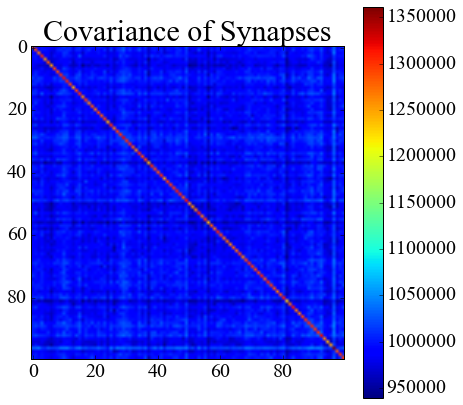

In [31]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 25
mpl.rc('font',family='Times New Roman')

sample_size = 100
total_samples = 1000
sample_covariances = np.empty((total_samples, sample_size, sample_size))
for i in range (total_samples):
    a = np.random.permutation(np.arange(cleaned.shape[0]))[:sample_size]
    csv_rand_sample = cleaned[a]
    sample_covariances[i,:,:] = np.cov(csv_rand_sample)

covar = np.mean(sample_covariances, axis=0)

plt.figure(figsize=(7,7))
plt.imshow(covar)
plt.title('Covariance of Synapses')
plt.colorbar()

diag = covar.diagonal()*np.eye(covar.shape[0])
hollow = covar-diag
d_det = np.linalg.slogdet(diag)[1]
h_det = np.linalg.slogdet(hollow)[1]

plt.savefig('Fig11.pdf', format='pdf', dpi=1000)
plt.show()